<h1><b>인공지능개론 3주차 퀴즈</b></h1>
<p>컴퓨터공학과 202136038 조성준</p>


---

<h2><b>1. 데이터 로딩</b></h2>

In [2]:
import pandas as pd
car_evaluation = pd.read_csv('/content/car_evaluation.csv')
#컬럼명 직접 지정
df = pd.read_csv('/content/car_evaluation.csv', names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"], header=None)

# 데이터프레임 확인
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
# 컬렴명 확인
print(df.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


<h2><b>2. 결측치 확인</b></h2>

In [4]:
# 결측치 확인
print(df.isnull().sum())
# 확인 결과: 결측치가 확인되지않음

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


<h2><b>3. 레이블 확인(imbalanced data)</b></h2>
<li>타겟 변수(class)의 분포를 확인</li>

,count
class,
unacc,1210
acc,384
good,69
vgood,65


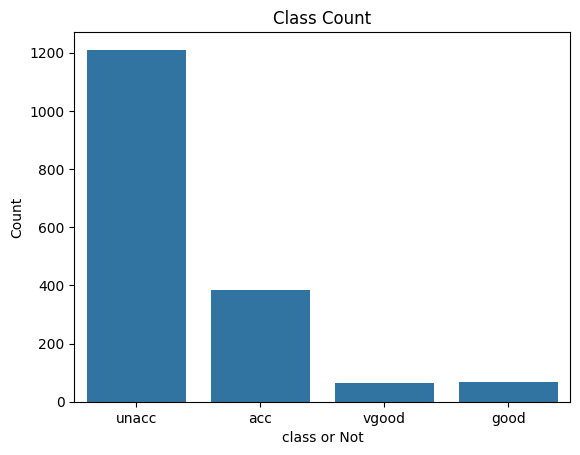

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# 레이블 갯수 확인 (그래프)
sns.countplot(data=df, x="class")
plt.xlabel("class or Not")
plt.ylabel("Count")
plt.title("Class Count")
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

<h2><b>4. 라벨 인코딩(숫자로 변환)</b></h2>

In [6]:
from sklearn.preprocessing import LabelEncoder

# df.['label'].value counts()를 변환 전
print("변환 전 데이터:")
print(df['class'].value_counts())

# LabelEncoder 초기화
label_encoder = LabelEncoder()

# 특정 컬럼만 인코딩
columns_to_encode = ['class']  # 인코딩할 컬럼 리스트
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# df.['label'].value counts()를 변환 후
print("\n변환 후 데이터:")
print(df['class'].value_counts())

변환 전 데이터:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

변환 후 데이터:
class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


<h2><b>5. 5가지 분류( RF, DT, LR, KNN, SVM )</b></h2>

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 모든 범주형 데이터를 숫자로 변환
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# 데이터 분리
X = df.drop(columns=["class"])  # 특성 데이터
y = df["class"]  # 타겟 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler 적용 (트리 기반 모델 제외)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Encoding & Scaling 완료!")

Encoding & Scaling 완료!


In [8]:
# 분류에 필요한 라이브러리 import
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<h3><b>RF 분류<b></h3>

---


In [9]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9710982658959537
[[ 75   7   1   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   0   0  16]]


<h3><b>DT 분류<b></h3>

---

In [10]:
print ("\n--- Decision Tree ---")
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Decision Tree ---
0.9682080924855492
[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]


<h3><b>LR 분류<b></h3>

---

In [11]:
print ("\n--- Logistic Regression ---")
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Logistic Regression ---
0.6589595375722543
[[ 11   0  69   3]
 [  2   0   9   0]
 [ 17   0 217   1]
 [ 12   0   5   0]]


<h3><b>KNN 분류<b></h3>

---

In [12]:
print ("\n--- KNN ---")
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- KNN ---
0.8786127167630058
[[ 58   4  20   1]
 [  6   5   0   0]
 [  1   0 234   0]
 [  5   2   3   7]]


<h3><b>SVM 분류<b></h3>

---

In [13]:
print ("\n--- SVM ---")
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- SVM ---
0.9132947976878613
[[ 63   0  20   0]
 [  5   5   0   1]
 [  2   0 233   0]
 [  2   0   0  15]]
